In [1]:
import cv2
import matplotlib.pyplot as plt

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import urllib.request
import os
from urllib.request import urlopen

driver = webdriver.Chrome('C:/Users/YOONSU/chromedriver.exe')

driver.get('https://www.google.co.kr/imghp?hl=ko&tab=ri&authuser=0&ogbl')

elem = driver.find_element_by_name("q")
elem.send_keys("cat")
elem.send_keys(Keys.RETURN)

driver.find_element_by_css_selector(".rg_i.Q4LuWd").click()
time.sleep(2)
imgUrl = driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div/div[2]/a/img").get_attribute("src")
urllib.request.urlretrieve(imgUrl,"cat.jpg")

('.jpg', <email.message.Message at 0x1c65573c550>)

In [22]:
img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
cv2.imshow('Image_Basic',img_basic)
cv2.waitKey(0)
cv2.imwrite('result1.png',img_basic)

cv2.destroyAllWindows()

img_gray = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
cv2.imshow('Image_Gray',img_gray)
cv2.waitKey(0)
cv2.imwrite('result2.png',img_gray)

True

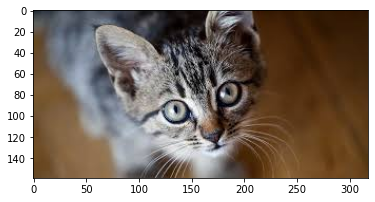

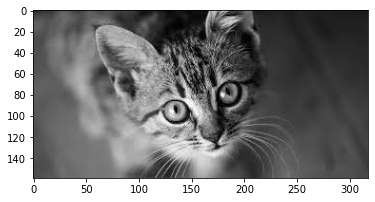

In [4]:
img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_GRAY2RGB))
plt.show()